# Assignment - Data Visualization/Exploratory Data Analysis
## Data Collection and Data Cleaning

### Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Load the Dataset

In [207]:
data = pd.read_csv('../DataSet/tata.csv')

In [208]:
#View of dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0


In [209]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2505,2020-06-02,90.000000,97.300003,89.750000,96.500000,96.500000,125407771.0
2506,2020-06-03,100.000000,101.449997,97.400002,98.750000,98.750000,90598067.0
2507,2020-06-04,99.000000,101.400002,96.800003,98.500000,98.500000,72078707.0
2508,2020-06-05,100.449997,112.449997,99.050003,110.750000,110.750000,187209208.0
2509,2020-06-08,114.000000,119.150002,113.349998,115.449997,115.449997,136943010.0


### Checking numerical and categorical data

In [210]:
#Check datatype
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Data type of 'Date' is object. Rest of the data is in numerical form which is appropriate

In [211]:
#shape of the dataset
data.shape

(2510, 7)

In [212]:
#some statistical information about data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2.503000e+03
mean,315.110124,319.604985,310.055880,314.632045,309.719245,1.464909e+07
std,127.348791,128.405744,125.993359,127.127318,130.954874,1.695092e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,0.000000e+00
25%,202.240997,205.391998,199.782006,202.656502,187.865661,6.189464e+06
50%,295.826996,300.476990,290.299988,295.975006,292.810089,9.265718e+06
75%,422.399994,427.250000,417.199997,421.925003,421.899994,1.556190e+07
max,600.211975,605.901001,589.872986,598.133972,597.891846,1.872092e+08


In [213]:
# a broader description of the data
pdp.ProfileReport(data)

In [214]:
#Checking NULL values
data.isna().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [215]:
data[data.isnull().any(axis = 1)]

,Date,Open,High,Low,Close,Adj Close,Volume
437,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
476,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
606,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
648,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
985,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1214,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2359,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


As there are very less NaN rows so we will drop it.

In [216]:
#Dropping rows with null values
data.dropna(axis = 0,inplace = True)

In [217]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now there are no NaN values in the dataset

## Formatting data(Making datatypes compatible)

In our dataset only 'Date' are in object form which need to be changed to 'DateTime' format

In [218]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [219]:
data['Date'] = pd.to_datetime(data['Date'])

In [220]:
#Again check the datatypes
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [221]:
#sort the data according to 'Date'
data.sort_values('Date',inplace = True)

In [222]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-09,155.334000,161.141998,154.343994,160.212006,128.496658,29347238.0
1,2010-04-12,160.270996,160.270996,153.968994,154.552002,123.957092,29781931.0
2,2010-04-13,154.938004,155.669998,150.604996,153.296005,122.949738,49489395.0
3,2010-04-15,154.343994,157.787994,152.761002,153.423996,123.052391,30353385.0
4,2010-04-16,153.354996,156.214005,153.216995,155.283997,124.544197,17014036.0


## Univariate analysis
### Data analysis using Data Visualization

In [229]:
#boxplot to know the statistic of each column
mpl.rcParams['figure.figsize'] = 7,5

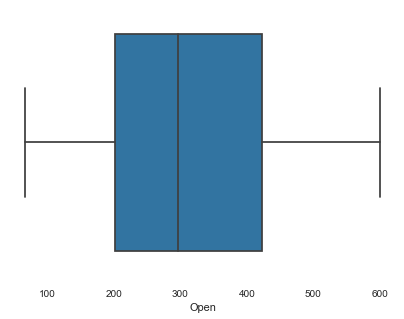

In [230]:
sb.boxplot(data.Open)
plt.show()

We can see that minimum value in column 'Open' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 410-430. There are no outliers in the 'Open' Column.

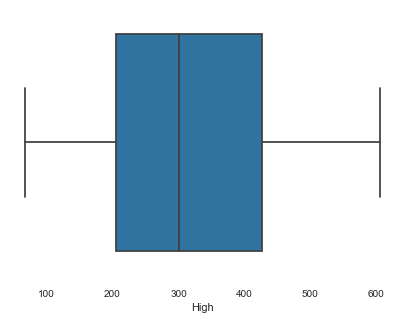

In [231]:
sb.boxplot(data['High'])
plt.show()

We can see that minimum value in column 'High' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 420-430. There are no outliers in the 'High' Column.

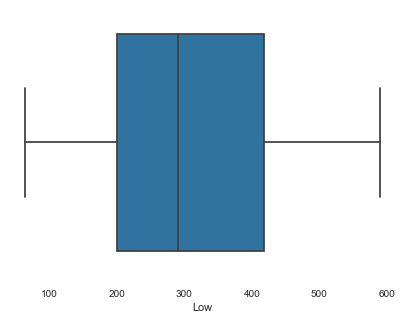

In [232]:
sb.boxplot(data.Low)
plt.show()

We can see that minimum value in column 'Low' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 420. There are no outliers in the 'Low' Column.

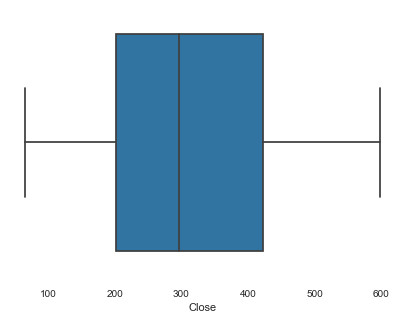

In [233]:
sb.boxplot(data.Close)
plt.show()

We can see that minimum value in column 'Close' is less than 100, maximum value is near 600. 25% quartile is near 200,median is around 300 and 75% quartile is around 410-430. There are no outliers in the 'Close' Column.

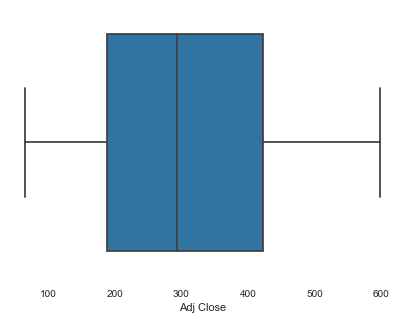

In [234]:
sb.boxplot(data['Adj Close'])
plt.show()

We can see that minimum value in column 'Adj Close' is less than 100, maximum value is near 600. 25% quartile is 190-200,median is in between 290-300 and 75% quartile is around 410-430. There are no outliers in the 'Adj Close' Column.

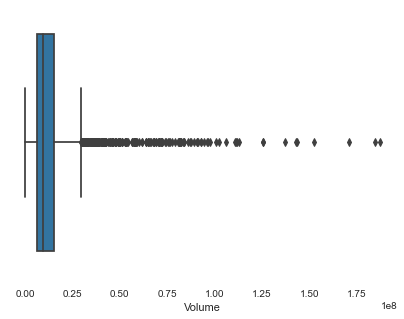

In [235]:
sb.boxplot(data['Volume'])
plt.show()

We can see that there are too many outliers in the data

## Check the distribution of data

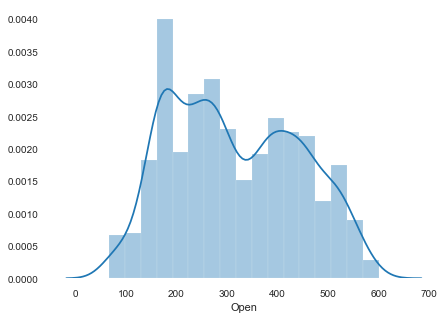

In [236]:
sb.distplot(data.Open)
plt.show()

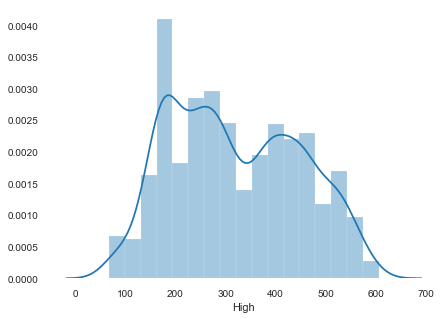

In [237]:
sb.distplot(data.High)
plt.show()

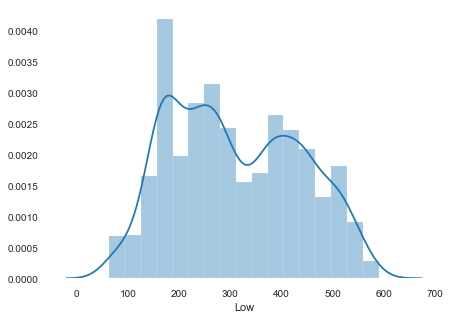

In [238]:
sb.distplot(data.Low)
plt.show()

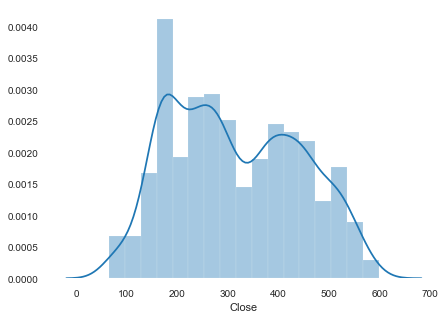

In [239]:
sb.distplot(data.Close)
plt.show()

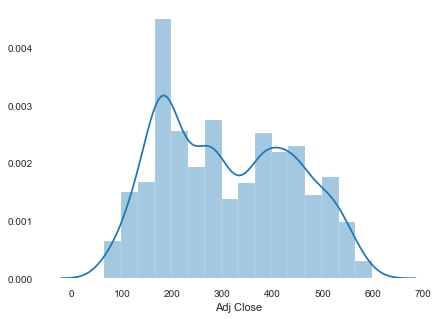

In [240]:
sb.distplot(data['Adj Close'])
plt.show()

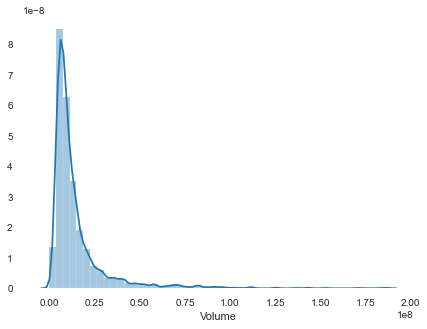

In [241]:
sb.distplot(data.Volume)
plt.show()

## Bivariate Analysis

In [242]:
#store the columns of the data in a list
columns = data.columns
#remove column of date from the list
columns = columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

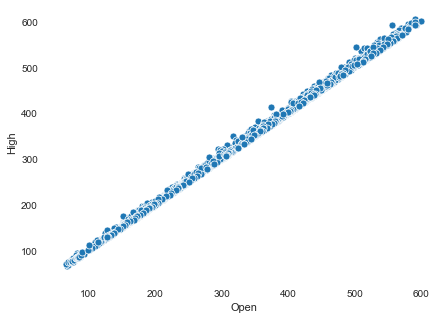

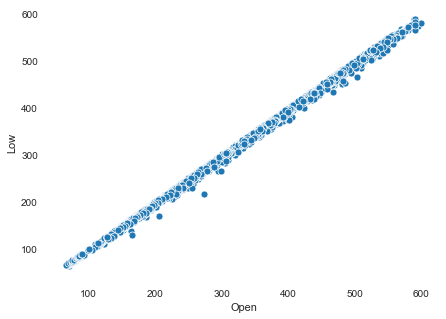

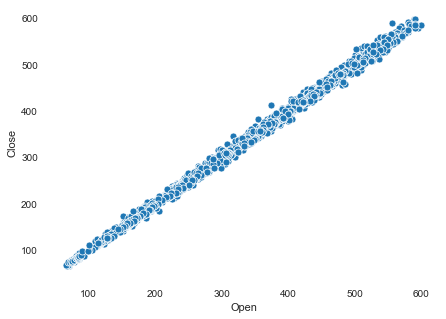

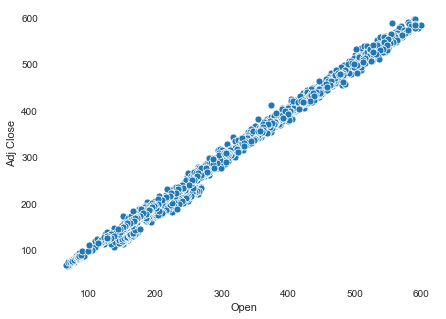

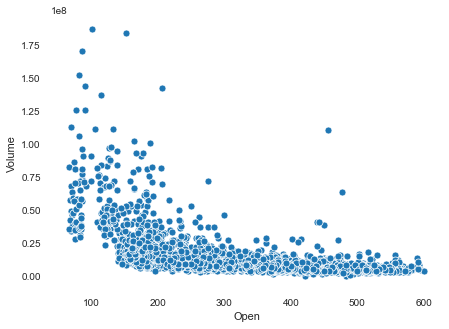

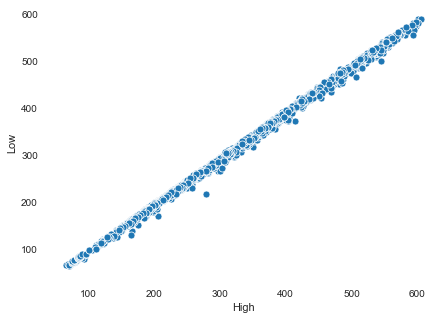

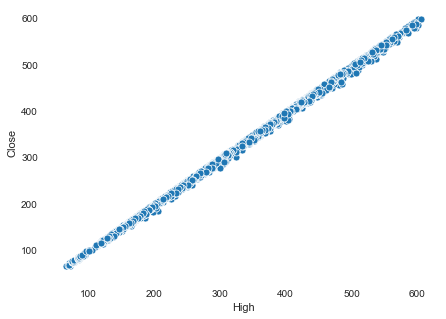

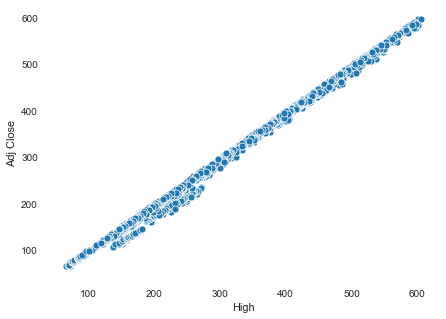

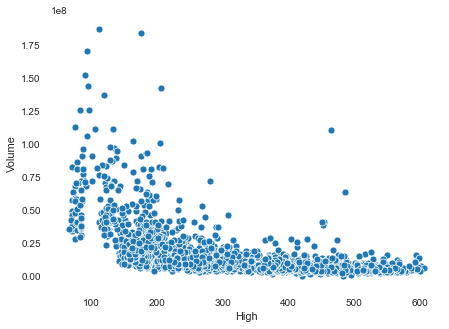

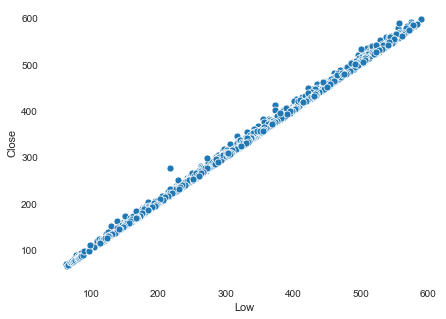

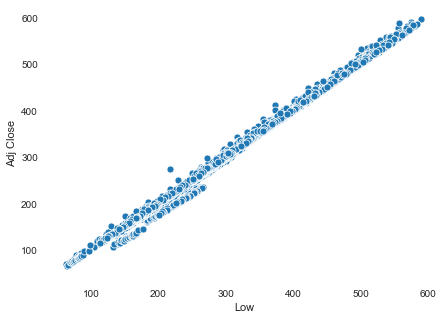

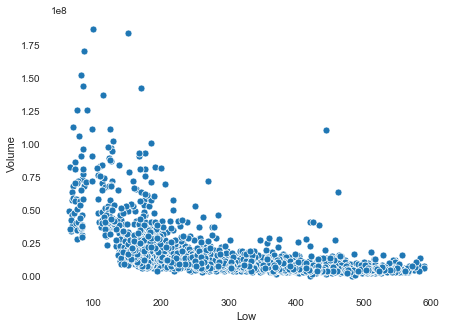

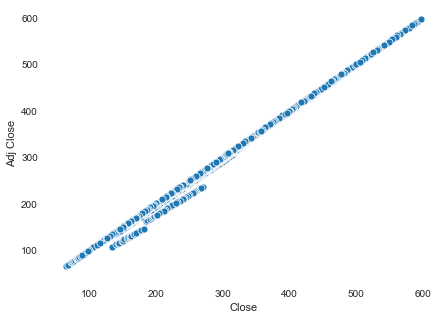

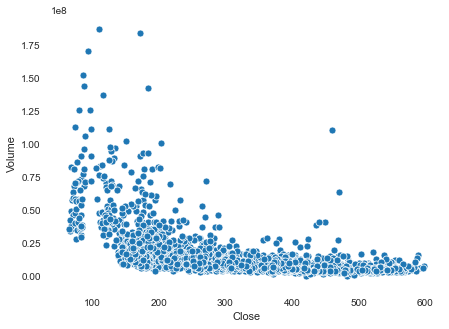

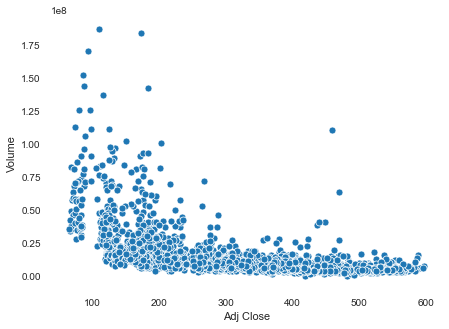

In [243]:
#plotting scatter plot between each column to know the bivariate distribution of the data
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if i == j:
            continue
        else:
            sb.scatterplot(data[columns[i]],data[columns[j]],legend = 'brief')
            plt.show()

## Checking for outliers

In [244]:
#Import required packages

In [245]:
from scipy import stats

In [246]:
# Here we use zscore to identify outliers.
# If zscore is greater than 3 or less than -3 then it will be considered as outlier

### Outliers in Column 'Open'

In [248]:
z_open = stats.zscore(data.Open)

In [249]:
#Check for minimum and maximum zscore
print(z_open.min())
print(z_open.max())

-1.9525886320982753
2.239195350744357


We can see there are  no outliers in column 'Open'

### Outliers in Column 'High'

In [250]:
z_high = stats.zscore(data.High)
print(z_high.min())
print(z_high.max())

-1.9684125509543309
2.230065528318003


It is obvious that there are no outliers in column 'High'

### Outliers in Column 'Low'

In [251]:
z_low = stats.zscore(data.Low)
print(z_low.min())
print(z_low.max())

-1.957286870943349
2.2213315232307567


There are no outliers in column 'Low'

### Outliers in Column 'Close'

In [252]:
z_close = stats.zscore(data.Close)
print(z_close.min())
print(z_close.max())

-1.9616701378675516
2.2305085955497526


In [253]:
z_close = abs(z_close)
outlier = np.where(z_close > 3)
outlier = list(outlier[0])
for i in outlier:
    zs.add(i)

No outliers in column 'Close'

### Outliers in Column 'Adj Close'

In [254]:
z_aclose = stats.zscore(data['Adj Close'])
print(z_aclose.min())
print(z_aclose.max())

-1.866811623687987
2.2009885877052326


No outliers in column 'Adj Close'

### Outliers in Column 'Volume'

In [255]:
z_vol = stats.zscore(data.Volume)
print(z_vol.min())
print(z_vol.max())

-0.8643792468299119
10.182021659862707


There are outliers in Volume

# Removing Outliers
In our dataset,only 'Volume' column consists of outliers. So we will remove outliers from 'Volume' Column

In [256]:
z_vol = abs(z_vol)
outlier = np.where(z_vol > 3)
outlier = list(outlier[0])

In [257]:
data.shape

(2503, 7)

In [258]:
data.drop(outlier,inplace = True)

In [259]:
data.shape

(2437, 7)

We removed the rows with outliers

# Correlation Matrix to Identify Relevent Columns

In [260]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999406,0.999327,0.998700,0.996423,-0.514988
High,0.999406,1.000000,0.999339,0.999555,0.997320,-0.509011
Low,0.999327,0.999339,1.000000,0.999432,0.997044,-0.518687
Close,0.998700,0.999555,0.999432,1.000000,0.997624,-0.512351
Adj Close,0.996423,0.997320,0.997044,0.997624,1.000000,-0.500368
Volume,-0.514988,-0.509011,-0.518687,-0.512351,-0.500368,1.000000


We can see that there is a positive and high correlation among 'Open','High','Low','Close','Adj Close'.
'Volume' is negatively correlated with other columns

## Correlation Matrix

In [261]:
corr_mat = data.corr()

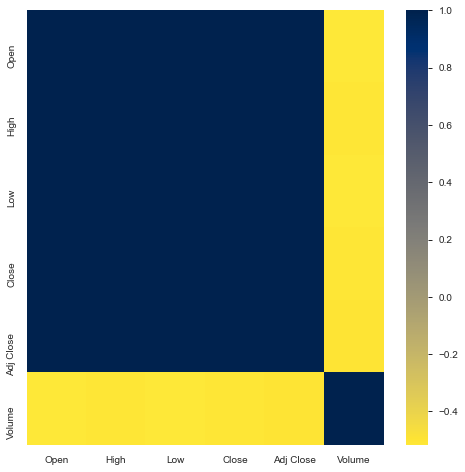

In [262]:
f,ax = plt.subplots(figsize = (8,8))
sb.heatmap(corr_mat,ax = ax,cmap = 'cividis_r')

These are highly correlated with each other
* Open with High,Low,Close,Adj Close
* High with Open,Low,Close,Adj Close
* Low with Open,High,Close,Adj Close
* Close with Open,High,Low,Adj Close
* Adj Close with Open,High,Low,Close

Below are very less correlated 
* Volume and all other columns